In [9]:
import torch
import torchvision
import gudhi as gd
from gudhi.wasserstein import wasserstein_distance

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import numpy as np
from copy import deepcopy
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
%matplotlib inline

from ripser import lower_star_img
from ripser import Rips

import persim
import diagram2vec

import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn import functional as F

import gudhi as gd
from gudhi.wasserstein import wasserstein_distance as dist_w

from IPython.display import clear_output
import pandas as pd
from PIL import Image
import importlib

from transforms import *


In [ ]:
def process_by_direction_images(dataset, alpha, count=3):
    idxes = np.random.randint(0, len(dataset), count)
    images = []
    for idx in idxes:
        images.append(dataset[idx][0])
    processed = [process_by_direction(image, alpha) for image in images]
    fig, axs = plt.subplots(2, count, figsize=(10, 5))
    for i in range(count):
        axs[0, i].imshow(images[i], cmap='gray')
        axs[1, i].imshow(processed[i], cmap='gray')
    plt.show()

In [199]:
def cedt(img, window_size):
    img /= img.max()
    img = maximum_filter(img, size=window_size)
    positive_edt = torch.Tensor(distance_transform_edt(img > 0.5))
    negative_edt = torch.Tensor(distance_transform_edt(img <= 0.5))
    cedt = positive_edt - negative_edt
    return cedt

def process_cedt_thickening_images(dataset, thickening, count=3):
    idxes = np.random.randint(0, len(dataset), count)
    images = []
    for idx in idxes:
        images.append(dataset[idx][0])
    processed = [cedt(image, thickening) for image in images]
    fig, axs = plt.subplots(2, count, figsize=(10, 5))
    for i in range(count):
        axs[0, i].imshow(images[i], cmap='gray')
        axs[1, i].imshow(processed[i], cmap='gray')
    plt.show()

In [207]:
def process_conv_images(dataset, kernel_size, count=3):
    idxes = np.random.randint(0, len(dataset), count)
    images = []
    for idx in idxes:
        images.append(dataset[idx][0])
    conv = nn.Conv2d(1, 1, kernel_size=kernel_size)
    # print(conv(images[0][None, :, :]).shape)
    processed = [conv(torch.tensor(image[None, :, :]).float()) for image in images]
    fig, axs = plt.subplots(2, count, figsize=(10, 5))
    for i in range(count):
        axs[0, i].imshow(images[i], cmap='gray')
        axs[1, i].imshow(processed[i].squeeze().detach().numpy(), cmap='gray')
    plt.show()

## MNIST

### Directional

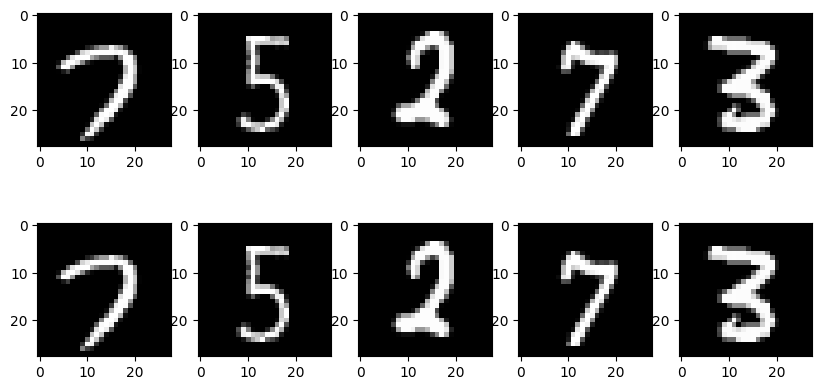

In [208]:
mnist_train = torch.load('../data/mnist/images_train.pt')
process_by_direction_images(mnist_train, 2 * math.pi / 3, 5)

### CEDT

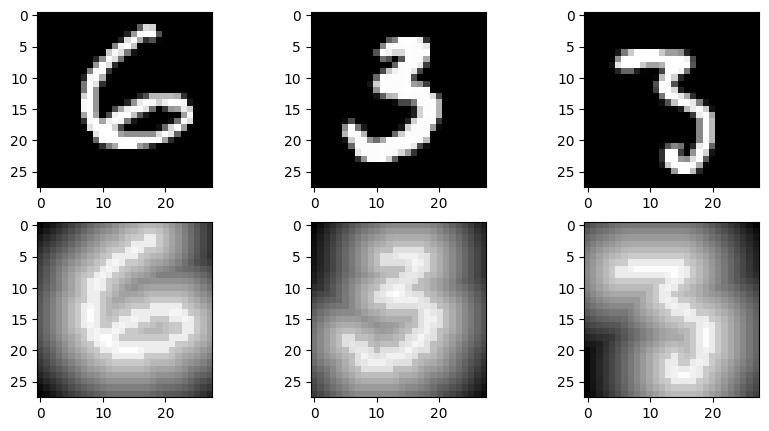

In [209]:
process_cedt_thickening_images(mnist_train, 0)

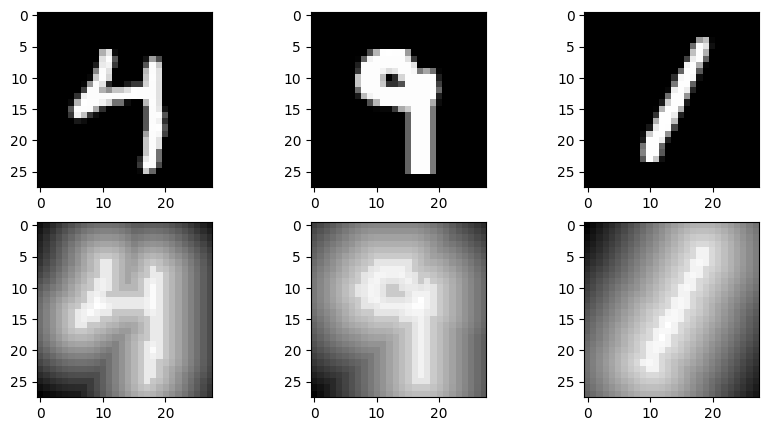

In [210]:
process_cedt_thickening_images(mnist_train, 1)

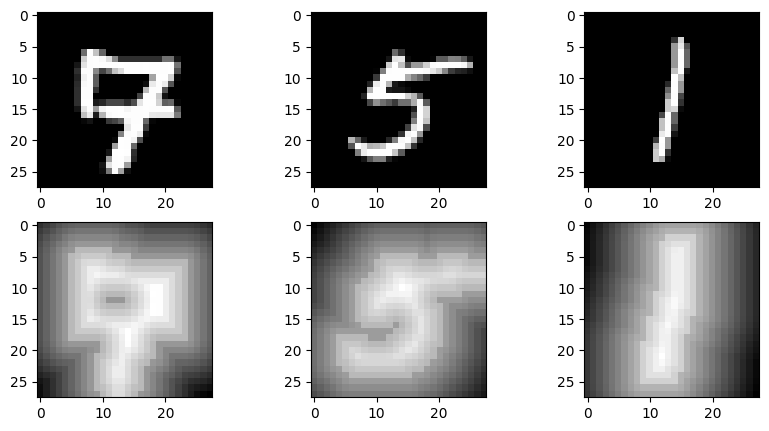

In [211]:
process_cedt_thickening_images(mnist_train, 5)

### Conv

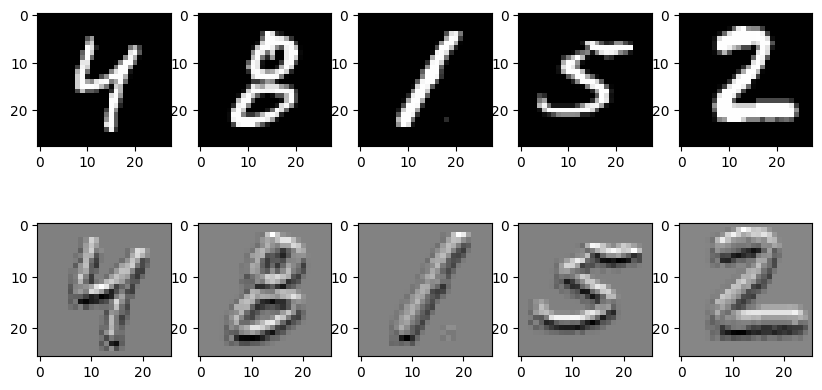

In [213]:
process_conv_images(mnist_train, 3, 5)


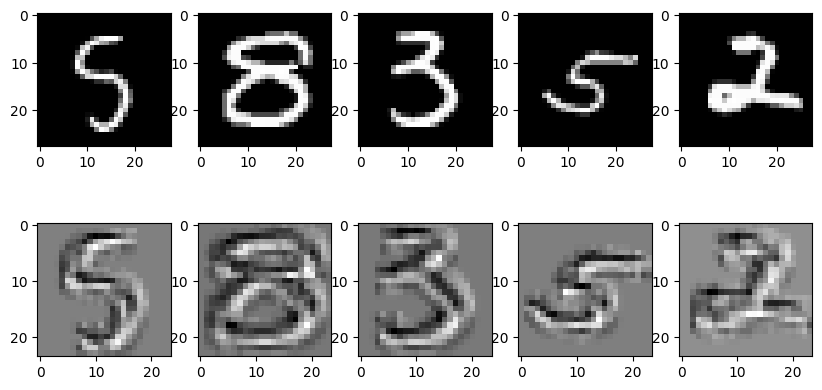

In [214]:
process_conv_images(mnist_train, 5, 5)

## CIFAR10

### Directional



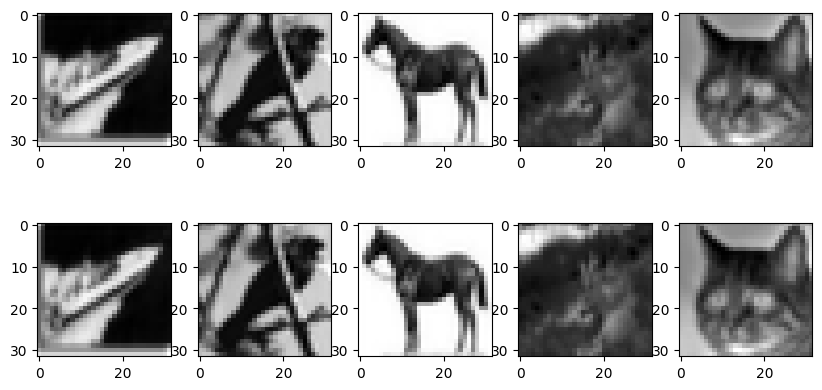

In [145]:
mnist_train = torch.load('../data/cifar10/images_train.pt')
process_by_direction_images(mnist_train, 2 * math.pi / 3, 5)

### CEDT

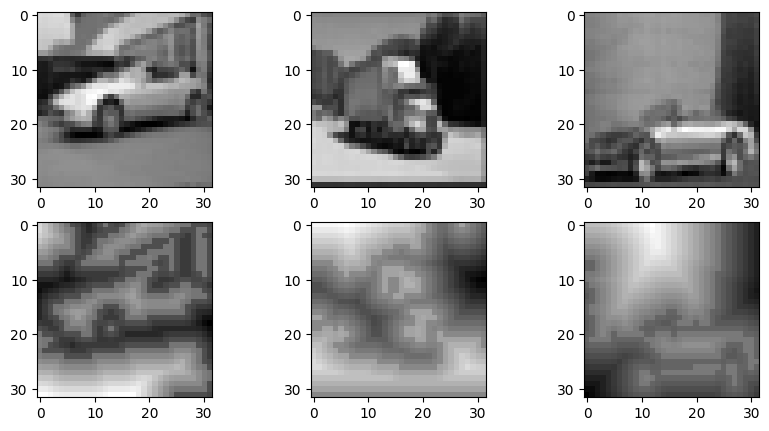

In [146]:
process_cedt_thickening_images(mnist_train, 0)

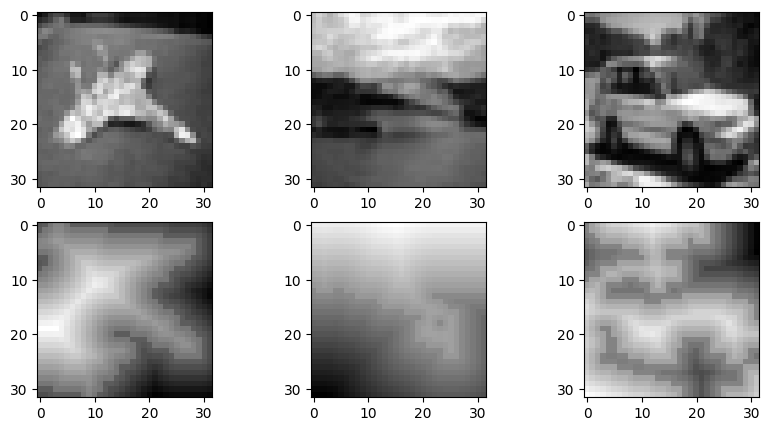

In [147]:
process_cedt_thickening_images(mnist_train, 3)

### Conv

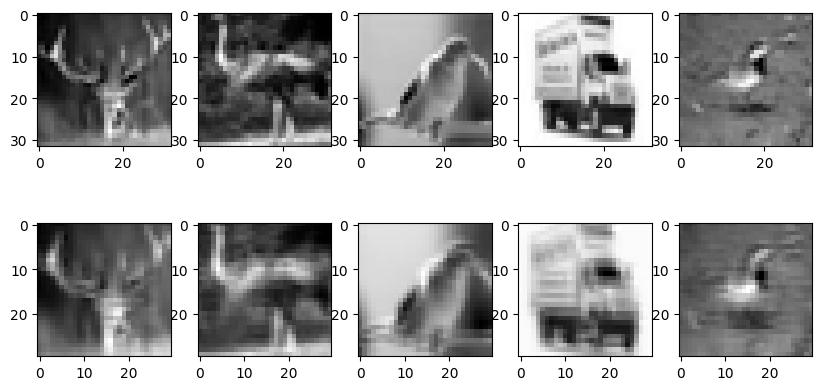

In [148]:
process_conv_images(mnist_train, 3, 5)

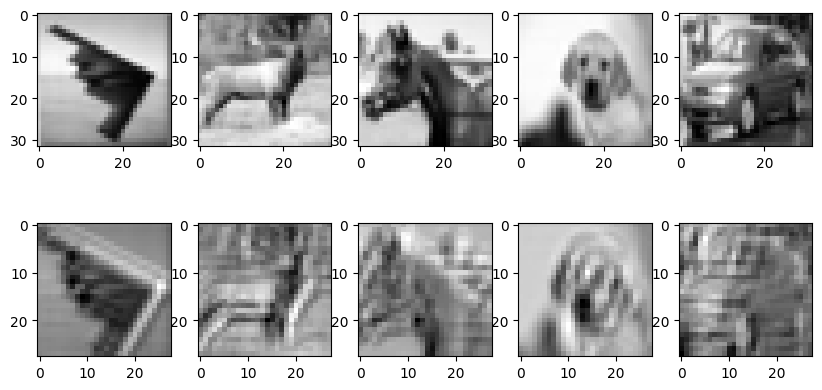

In [149]:
process_conv_images(mnist_train, 5, 5)

## Porus

### MNIST

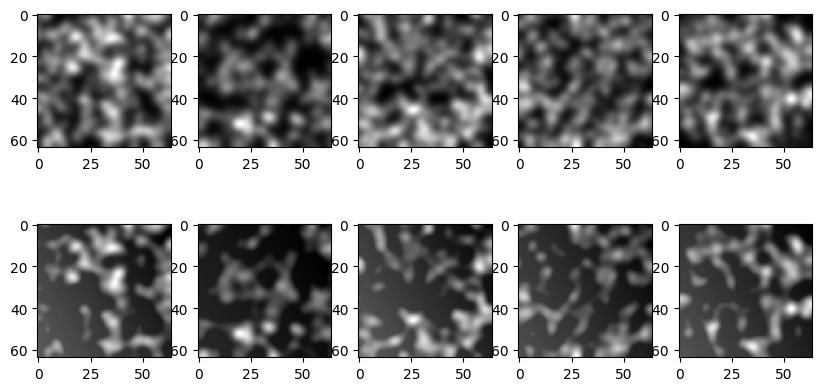

In [215]:
porus_train = torch.load('../data/porus/images_train.pt')
process_by_direction_images(porus_train, 2 * math.pi / 3, 5)

### CEDT

In [216]:
process_cedt_thickening_images(porus_train, 0)

TypeError: only integer scalar arrays can be converted to a scalar index